In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

%matplotlib inline

In [2]:
train_df = pd.read_csv("../../data/Processed/train2.csv", index_col='id')
test_df = pd.read_csv("../../data/Processed/test2.csv", index_col='id')

train_size = train_df.shape[0]
test_size = test_df.shape[0]
all_size = train_size + test_size

print("train data size : ", train_size)
print("test data size : ", test_size)
print("the ratio of train and test  ", train_size/all_size, " : ", test_size/all_size )
train_df.head()

train data size :  132250
test data size :  28340
the ratio of train and test   0.8235257488012953  :  0.17647425119870477


,period,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,A2-level,A3-weapon,A3-rank,A3-level,A4-weapon,A4-rank,A4-level,B1-weapon,B1-rank,B1-level,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,y,category1-A1,category2-A1,subweapon-A1,special-A1,mainweapon-A1,reskin-A1,range-main-A1,atack-main-A1,rapid-main-A1,vote-main-A1,fav-main-A1,damage_min-sub-A1,damage_max-sub-A1,ink-sub-A1,install_num-sub-A1,good-sub-A1,damage_min-special-A1,damage_max-special-A1,duration-special-A1,good-special-A1,category1-A2,category2-A2,subweapon-A2,special-A2,mainweapon-A2,reskin-A2,range-main-A2,atack-main-A2,rapid-main-A2,vote-main-A2,fav-main-A2,damage_min-sub-A2,damage_max-sub-A2,ink-sub-A2,install_num-sub-A2,good-sub-A2,damage_min-special-A2,damage_max-special-A2,duration-special-A2,good-special-A2,category1-A3,category2-A3,subweapon-A3,special-A3,mainweapon-A3,reskin-A3,range-main-A3,atack-main-A3,rapid-main-A3,vote-main-A3,fav-main-A3,damage_min-sub-A3,damage_max-sub-A3,ink-sub-A3,install_num-sub-A3,good-sub-A3,damage_min-special-A3,damage_max-special-A3,duration-special-A3,good-special-A3,category1-A4,category2-A4,subweapon-A4,special-A4,mainweapon-A4,reskin-A4,range-main-A4,atack-main-A4,rapid-main-A4,vote-main-A4,fav-main-A4,damage_min-sub-A4,damage_max-sub-A4,ink-sub-A4,install_num-sub-A4,good-sub-A4,damage_min-special-A4,damage_max-special-A4,duration-special-A4,good-special-A4,category1-B1,category2-B1,subweapon-B1,special-B1,mainweapon-B1,reskin-B1,range-main-B1,atack-main-B1,rapid-main-B1,vote-main-B1,fav-main-B1,damage_min-sub-B1,damage_max-sub-B1,ink-sub-B1,install_num-sub-B1,good-sub-B1,damage_min-special-B1,damage_max-special-B1,duration-special-B1,good-special-B1,category1-B2,category2-B2,subweapon-B2,special-B2,mainweapon-B2,reskin-B2,range-main-B2,atack-main-B2,rapid-main-B2,vote-main-B2,fav-main-B2,damage_min-sub-B2,damage_max-sub-B2,ink-sub-B2,install_num-sub-B2,good-sub-B2,damage_min-special-B2,damage_max-special-B2,duration-special-B2,good-special-B2,category1-B3,category2-B3,subweapon-B3,special-B3,mainweapon-B3,reskin-B3,range-main-B3,atack-main-B3,rapid-main-B3,vote-main-B3,fav-main-B3,damage_min-sub-B3,damage_max-sub-B3,ink-sub-B3,install_num-sub-B3,good-sub-B3,damage_min-special-B3,damage_max-special-B3,duration-special-B3,good-special-B3,category1-B4,category2-B4,subweapon-B4,special-B4,mainweapon-B4,reskin-B4,range-main-B4,atack-main-B4,rapid-main-B4,vote-main-B4,fav-main-B4,damage_min-sub-B4,damage_max-sub-B4,ink-sub-B4,install_num-sub-B4,good-sub-B4,damage_min-special-B4,damage_max-special-B4,duration-special-B4,good-special-B4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-10-15T20:00:00+00:00,5.0.1,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,soytuber_custom,NaN,118.0,pablo_hue,NaN,13.0,hokusai,NaN,10.0,bold_7,NaN,28,hokusai_becchu,NaN,26.0,herocharger_replica,NaN,68.0,sharp_neo,NaN,31.0,1,shooter,shooter,kyubanbomb,missile,sshooter,sshooter_becchu,50,45,60,1316,1107,30.0,180.0,70,0,104,30.0,150.0,10,173,charger,charger,curlingbomb,jetpack,soytuber,soytuber_custom,78,38,70,440,245,20.0,150.0,70,0,121,30.0,120.0,8,102,roller,brush,trap,sphere,pablo,pablo_hue,5.0,100.0,100.0,924.0,674.0,20.0,35.0,60.0,2.0,58.0,55.0,180.0,7.0,78.0,roller,brush,robotbomb,jetpack,hokusai,hokusai,23.0,80.0,85.0,1331.0,1104.0,30.0,150.0,70.0,0.0,111.0,30.0,120.0,8.0,102.0,shooter,shooter,splashbomb,ultrahanko,bold,bold_7,12,52,75,588,471,30.0,180.0,70,0,213,30.0,120.0,9,32,roller,brush,kyubanbomb,ultrahanko,hokusai,hokusai_becchu,23,80,85,482,377,30.0,180.0,70,0,104,30.0,120.0,9,32,charger,charger,splashbomb,presser,splatcharger,splatcharger,88.0,50.0,40.0,2170.0,1401.0,30.0,180.0,70.0,0.0,213.0,2.0,2.0,7.0,116.0,shooter,shooter,quickbomb,kyubanbomb_pitcher,sharp,sharp_neo,42.0,22.0,75.0,1862.0,1571.0,25.

## カラムの確認

In [3]:
print(train_df.columns)

Index(['period', 'game-ver', 'lobby-mode', 'lobby', 'mode', 'stage',
       'A1-weapon', 'A1-rank', 'A1-level', 'A2-weapon',
       ...
       'fav-main-B4', 'damage_min-sub-B4', 'damage_max-sub-B4', 'ink-sub-B4',
       'install_num-sub-B4', 'good-sub-B4', 'damage_min-special-B4',
       'damage_max-special-B4', 'duration-special-B4', 'good-special-B4'],
      dtype='object', length=191)


In [4]:
train_df["period"] = pd.to_datetime(train_df['period'])
test_df["period"] = pd.to_datetime(test_df['period'])

print(train_df["period"].max() == test_df["period"].max())
print(train_df["period"].min() == test_df["period"].min())

True
True


<AxesSubplot:>

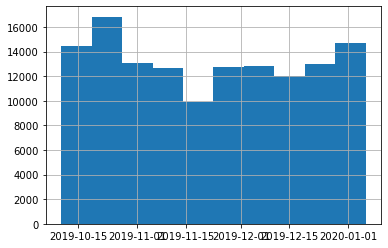

In [5]:
train_df["period"].hist()

<AxesSubplot:>

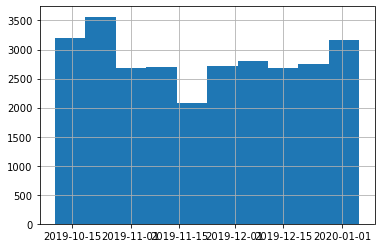

In [6]:
test_df["period"].hist()

In [7]:
print(train_df["A1-level"].max())
print(train_df["A1-level"].min())
print(train_df["A1-level"].std())

920
1
111.72268714271645


In [9]:
train_df["category1-A1"].unique()

array(['shooter', 'brella', 'charger', 'slosher', 'roller', 'splatling'],
      dtype=object)

In [11]:
train_df["category2-A1"].unique()

array(['shooter', 'brella', 'charger', 'slosher', 'maneuver', 'roller',
       'splatling', 'blaster', 'reelgun', 'brush'], dtype=object)

In [13]:
train_df[["category1-A1", "category2-A1"]].head()

,category1-A1,category2-A1
id,,
1,shooter,shooter
1,shooter,shooter
2,shooter,shooter
2,brella,brella
3,shooter,shooter


In [16]:
train_df["stage"].unique().shape

(23,)